# Text Vectorization and Baseline Model

## Purpose
This notebook converts the cleaned IMDb movie reviews into numerical representations suitable for machine learning models and builds a baseline classifier to benchmark future deep learning models (RNN, LSTM, GRU).  
By establishing a baseline, we can measure the effectiveness of more complex architectures later.

## Steps Covered
1. Load preprocessed training and testing data.
2. Tokenize text and transform it into numerical format using:
   - TF-IDF vectorization (for baseline ML model).
   - Tokenizer and padding (for deep learning models).
3. Train and evaluate a baseline machine learning model:
   - Logistic Regression (or Naive Bayes).
4. Save the vectorizer and baseline model for later comparison.


In [3]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
# Load preprocessed data
X_train = pd.read_csv(r"F:\Projects\Sentiment Analysis\data\X_train.csv")['clean_review']
X_test = pd.read_csv(r"F:\Projects\Sentiment Analysis\data\X_test.csv")['clean_review']
y_train = pd.read_csv(r"F:\Projects\Sentiment Analysis\data\y_train.csv").squeeze()
y_test = pd.read_csv(r"F:\Projects\Sentiment Analysis\data\y_test.csv").squeeze()

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 39665
Testing samples: 9917


In [5]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [6]:
# Train Baseline Model (Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [7]:
# Predictions
y_pred = model.predict(X_test_tfidf)

Accuracy: 0.893717858223253

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      4939
           1       0.88      0.91      0.90      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



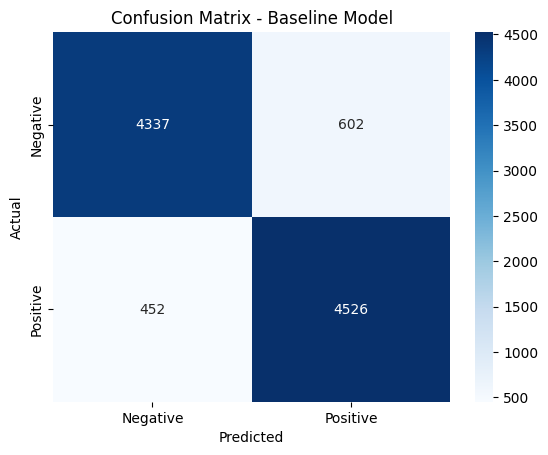

In [8]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Baseline Model')
plt.show()

In [11]:
# Save model and vectorizer
joblib.dump(tfidf, r"F:\Projects\Sentiment Analysis\models\tfidf_vectorizer.pkl")
joblib.dump(model, r"F:\Projects\Sentiment Analysis\models\baseline_logreg.pkl")

['F:\\Projects\\Sentiment Analysis\\models\\baseline_logreg.pkl']